In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots
from  statsmodels.tsa import stattools
import pandas as pd
from create_table import Table
import FATS

In [41]:
#We open the ligth curve in two different bands
lc_B = FATS.ReadLC_MACHO('lc_1.4418.1930.B.mjd') #1.3320.14 #58.6272.729 1.3444.614 1.4652.1527
lc_R = FATS.ReadLC_MACHO('lc_1.4418.1930.R.mjd')

#We import the data
[mag, time, error] = lc_B.ReadLC()
[mag2, time2, error2] = lc_R.ReadLC()

#We preprocess the data
preproccesed_data = FATS.Preprocess_LC(mag, time, error)
[mag, time, error] = preproccesed_data.Preprocess()

preproccesed_data = FATS.Preprocess_LC(mag2, time2, error2)
[mag2, time2, error2] = preproccesed_data.Preprocess()

#We synchronize the data
if len(mag) != len(mag2):
    [aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2] = \
    FATS.Align_LC(time, time2, mag, mag2, error, error2)
    
lc = np.array([mag, time, error, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2])

In [69]:
#Random walk

N = 50000
alpha = 1
sigma = 0.5

mag_rw = np.zeros([N,1])
mag_rw[0] = 1

time_rw = xrange(1, N)

for t in time_rw:
    mag_rw[t] = alpha * mag_rw[t-1] + np.random.normal(loc=0.0, scale=sigma )
time_rw = np.array(range(0,N))
mag_rw = mag_rw.squeeze()

In [65]:
#Structure function

from scipy.interpolate import interp1d

def structure_function(mag,time, Nsf, Np):
    sf = np.zeros(Nsf)
    sf2 = np.zeros(Nsf)
    f = interp1d(time, mag)
    time_int = np.linspace(np.min(time), np.int64((np.min(time)+np.max(time)))/2.0, Np)
    mag_int = f(time_int) 
    for tau in np.arange(1, Nsf):
        #print tau
        sf[tau-1]=np.mean(np.power( np.abs(mag_int[0:Np-tau] - mag_int[tau:Np]) , 1.0))
        sf2[tau-1]=np.mean(np.abs(np.power (np.abs( mag_int[0:Np-tau] - mag_int[tau:Np]) , 2.0)))

    return mag_int, time_int, sf, sf2

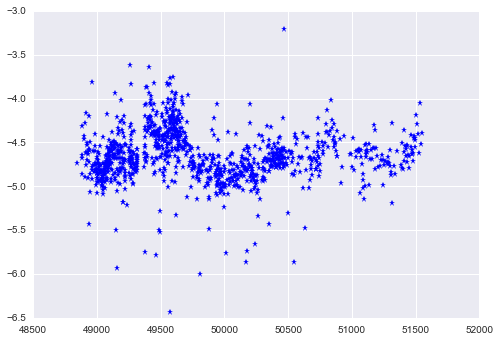

In [58]:
plt.plot(time,mag,'b*')

In [70]:
Nsf=100
Np = 100
[mag_int, time_int, sf, sf2] = structure_function(mag_rw,time_rw, Nsf, Np)

In [60]:
Nsf=100
Np = 100
[mag_int, time_int, sf, sf2] = structure_function(mag,time, Nsf, Np)

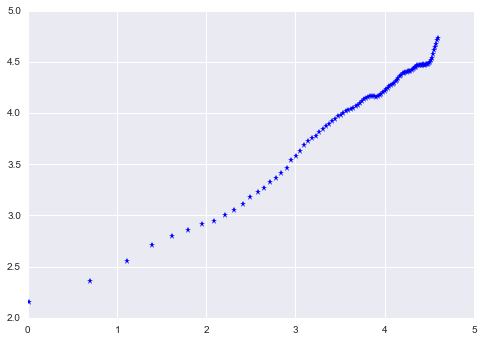

In [71]:
plt.plot(np.log( np.linspace(0,Nsf, Nsf)),np.log(sf)/1.0, 'b*')
# plt.xlim([0,4])
# plt.ylim([-3,-1])

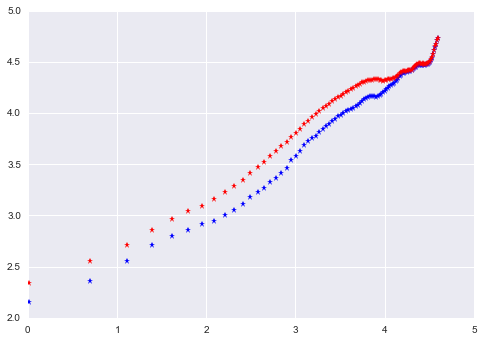

In [73]:
plt.plot(np.log( np.linspace(0,Nsf, Nsf)),np.log(sf)/1.0, 'b*')
plt.plot(np.log( np.linspace(0,Nsf, Nsf)),np.log(sf2)/2.0, 'r*')

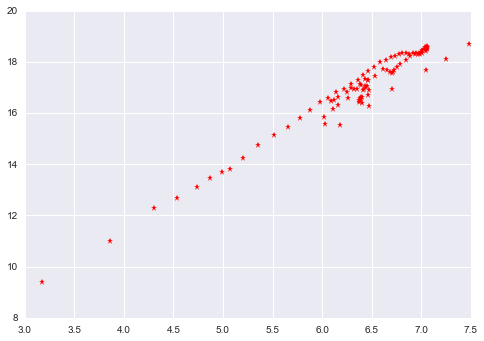

In [53]:
plt.plot(np.log(sf),np.log(sf2),'r*')

In [54]:
slope, intercept = np.polyfit(np.log(sf)[10:-40],np.log(sf2)[10:-40], 1)
print slope, intercept

2.06687307526 4.02572737748


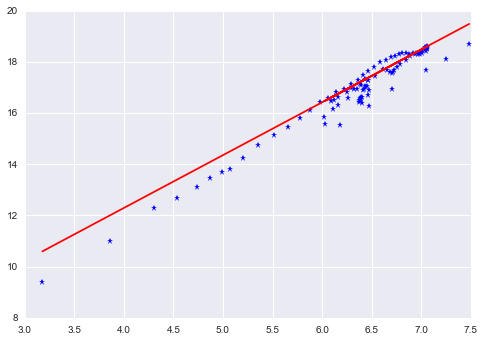

In [55]:
plt.plot(np.log(sf),np.log(sf2),'b*',np.log(sf), slope*np.log(sf)+intercept,'r-')